<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/3.%20Risk%20Management%20and%20Financial%20Analysis/Customers_E_Signing_Classification/E_Signing_Of_Customer_Based_Financial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Content
1. [Preparing Project](#1)
    * 1.1 [Connecting to Kaggle](#1.1)
    * 1.2 [Downloading Dataset](#1.2)
    * 1.3 [Libraries](#1.3)
    * 1.4 [Dataset](#1.4)
2. [Data Exploration](#2)
    * 2.1 [Getting to Know the Varibales](#2.1)
    * 2.2 [Check Unique Values](#2.2)
    * 2.3 [Missing Values](#2.3)
    * 2.4 [Statistical Summary](#2.4)
3. [Exploratory Data Analysis](#3)
    * 3.1 [Countplot](#3.3)
    * 3.2 [Distributions](#3.1)
    * 3.3 [Boxplot](3.3)
    
4. [Preprocessing](#4)
    * 4.1 [Encoding Categorical Variables](#4.1)
    * 4.2 [Feature Engineering](#4.2)
5. [Correlation Matrix & Heatmap](#5)
    * 5.1 [Correlation Bar](#5.1)
    * 5.2 [Correlation Heatmap](#5.2)
6. [Preparing for Modelling](#6)
    * 6.1 [Split Depentend/Indepented Variables](#6.1)
    * 6.2 [Definning Train/Test Sets](6.2)
    * 6.3 [Feature Scaling](#6.3)
7. [Machine Learning Model](#7)
    * 7.1 [LogisticRegression](#7.1)
    * 7.2 [SVC](#7.2)
    * 7.3 [RandomForest Classifier](#7.3)
        * 7.3.1 [Hyperparameter Search](#7.3.1)
    * 7.4 [XGBoost Classifier](#7.4)
        * 7.4.1 [Hyperparameter Search](#7.4.1)



# 1. Preparing Project

## 1.1 Connecting to Kaggle <a id=1.1></a>

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_PASS"] = userdata.get('KAGGLE_PASS')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

## 1.2 Downloading Dataset <a id=1.2></a>

In [ ]:
!kaggle datasets download -d aniruddhachoudhury/esigning-of-loan-based-on-financial-history

Dataset URL: https://www.kaggle.com/datasets/aniruddhachoudhury/esigning-of-loan-based-on-financial-history
License(s): unknown
100% 839k/839k [00:00<00:00, 1.29MB/s]
100% 839k/839k [00:00<00:00, 1.29MB/s]


In [ ]:
!unzip esigning-of-loan-based-on-financial-history.zip

Archive:  esigning-of-loan-based-on-financial-history.zip
  inflating: financial_data.csv      


## 1.3 Libraries <a id=1.3></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1.4 Dataset <a id=1.4></a>

In [ ]:
df = pd.read_csv('/content/financial_data.csv')
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


# 2. Exploring Dataset <a id=2></a>

In [ ]:
df.shape

(17908, 21)

In [ ]:
df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

## 2.1 Getting to Know The DataFrame's Variables <a id=2.1></a>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

1. **entry_id**: Unique identifier for each entry in the dataset.
2. **age**: Age of the individual.
3. **pay_schedule**: The schedule on which the individual is paid (e.g., weekly, bi-weekly, monthly).
4. **home_owner**: Binary variable indicating if the individual owns a home (1 if yes, 0 if no).
5. **income**: Annual income of the individual.
6. **months_employed**: Number of months the individual has been employed.
7. **years_employed**: Number of years the individual has been employed.
8. **current_address_year**: Number of years the individual has lived at their current address.
9. **personal_account_m**: Number of months since the individual opened their personal account.
10. **personal_account_y**: Number of years since the individual opened their personal account.
11. **has_debt**: Binary variable indicating if the individual has any debt (1 if yes, 0 if no).
12. **amount_requested**: Amount of money the individual has requested.
13. **risk_score**: Risk score assigned to the individual.
14. **risk_score_2**: Secondary risk score assigned to the individual (floating-point number).
15. **risk_score_3**: Tertiary risk score assigned to the individual (floating-point number).
16. **risk_score_4**: Another risk score assigned to the individual (floating-point number).
17. **risk_score_5**: Yet another risk score assigned to the individual (floating-point number).
18. **ext_quality_score**: External quality score assigned to the individual (floating-point number).
19. **ext_quality_score_2**: Secondary external quality score (floating-point number).
20. **inquiries_last_month**: Number of inquiries made about the individual in the last month.
21. **e_signed**: Binary variable indicating if the individual electronically signed (1 if yes, 0 if no).

## 2.2 Unique Values <a id=2.2><a/>

In [ ]:
df.select_dtypes(include='number').columns

Index(['entry_id', 'age', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed'],
      dtype='object')

In [ ]:
df.select_dtypes(include='object').columns

Index(['pay_schedule'], dtype='object')

## 2.3 Missing Values <a id=2.3></a>

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

_The DataFrame does not have any missing values in columns neither rows._

## 2.4 Statistical Summary <a id=2.4></a>

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
entry_id,17908.0,5.596978e+06,2.562473e+06,1.111398e+06,3.378999e+06,5.608376e+06,7.805624e+06,9.999874e+06
age,17908.0,4.301541e+01,1.187311e+01,1.800000e+01,3.400000e+01,4.200000e+01,5.100000e+01,9.600000e+01
home_owner,17908.0,4.251731e-01,4.943830e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
income,17908.0,3.657215e+03,1.504890e+03,9.050000e+02,2.580000e+03,3.260000e+03,4.670000e+03,9.985000e+03
months_employed,17908.0,1.186006e+00,2.400897e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01
years_employed,17908.0,3.526860e+00,2.259732e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.600000e+01
current_address_year,17908.0,3.584711e+00,2.751937e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.200000e+01
personal_account_m,17908.0,3.427183e+00,2.216440e+00,0.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,1.100000e+01
personal_account_y,17908.0,3.503350e+00,1.955568e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.500000e+01
has_debt,17908.0,7.953987e-01,4.034212e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


1. **entry_id**:
   - This column represents unique identifiers with a wide range, indicating it is a primary key.

2. **age**:
   - The age distribution shows a typical working-age range with some older individuals.

3. **home_owner**:
   - Binary variable indicating whether the individual owns a home; about 42.5% are homeowners.

4. **income**:
   - Income ranges from low to high, with a mean indicating a middle-income bracket.

5. **months_employed**:
   - This shows that most individuals have been employed for a few months, with a high number at zero.

6. **years_employed**:
   - Individuals have a varying range of employment years, with an average of about 3.5 years.

7. **current_address_year**:
   - This indicates how long individuals have lived at their current address, with a mean of 3.6 years.

8. **personal_account_m**:
   - The number of months since the personal account was opened, with a mean of 3.4 months.

9. **personal_account_y**:
   - The number of years since the personal account was opened, with a mean of 3.5 years.

10. **has_debt**:
    - Binary variable indicating whether the individual has debt; about 79.5% have debt.

11. **amount_requested**:
    - The amount requested ranges from small to very large, with a mean of 950.

12. **risk_score**:
    - Risk scores vary widely, with a mean indicating moderate risk.

13. **risk_score_2**:
    - Secondary risk score, with most values clustered around the mean of 0.69.

14. **risk_score_3**:
    - Tertiary risk score, with higher scores indicating higher risk.

15. **risk_score_4**:
    - Another risk score with a mean of 0.58.

16. **risk_score_5**:
    - Yet another risk score with a mean of 0.72.

17. **ext_quality_score**:
    - External quality score with a mean of 0.62.

18. **ext_quality_score_2**:
    - Secondary external quality score, nearly identical to the first.

19. **inquiries_last_month**:
    - Number of inquiries last month, with a mean indicating moderate activity.

20. **e_signed**:
    - Binary variable indicating if the individual electronically signed, with about 54% having done so.

# 3. Exploratory Data Analysis <a id=3></a>

## 3.1 Countplot <a id=3.1></a>

In [ ]:
def count(col):
    plt.figure(figsize=(5, 5))
    sns.set_style('darkgrid')
    sns.countplot(data=df, x=col, palette='Blues_r', order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}',  fontdict={'weight': 'bold', 'color':'darkblue', 'size':12})
    plt.xlabel(col,  fontdict={'weight': 'bold', 'color':'darkblue', 'size':10})
    plt.ylabel('Count',  fontdict={'weight': 'bold', 'color':'darkblue', 'size':10})
    plt.show()

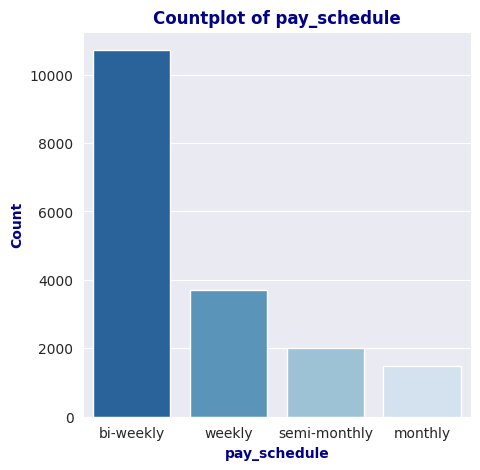

In [ ]:
count('pay_schedule')

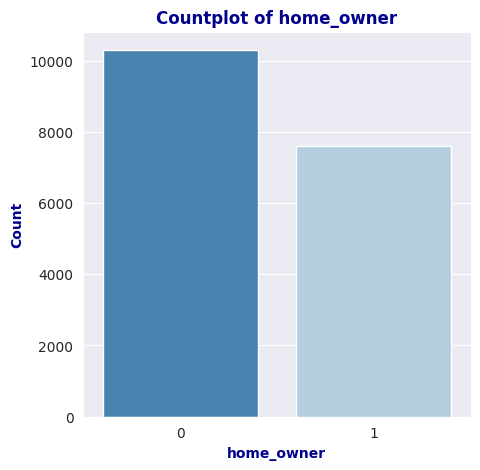

In [ ]:
count('home_owner')

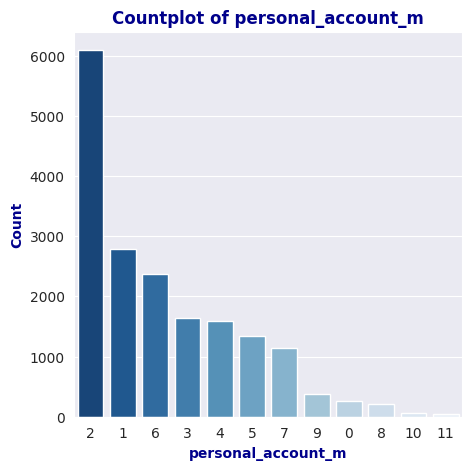

In [ ]:
count('personal_account_m')

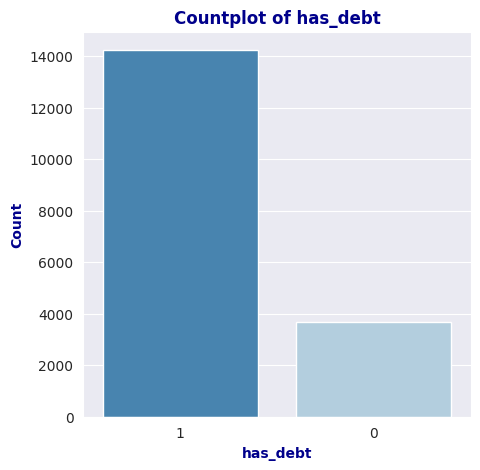

In [ ]:
count('has_debt')

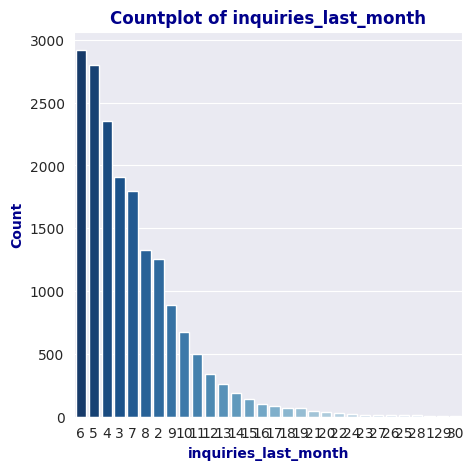

In [ ]:
count('inquiries_last_month')

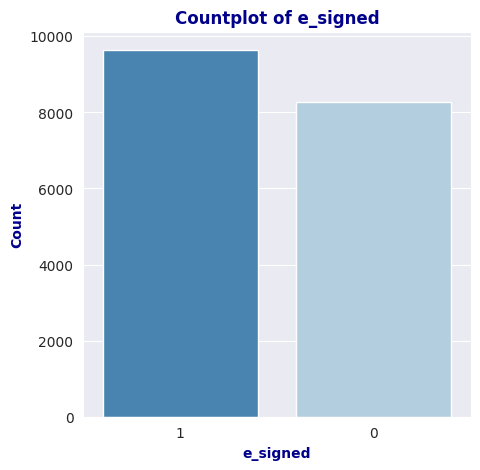

In [ ]:
count('e_signed')

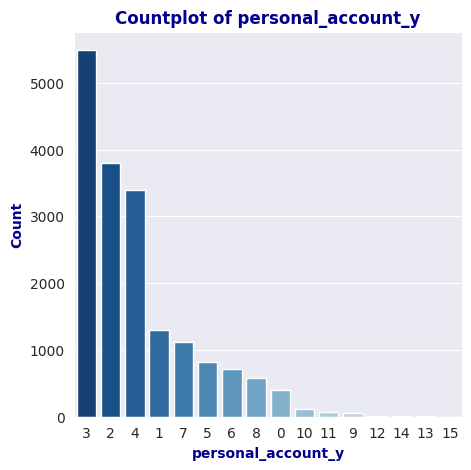

In [ ]:
count('personal_account_y')

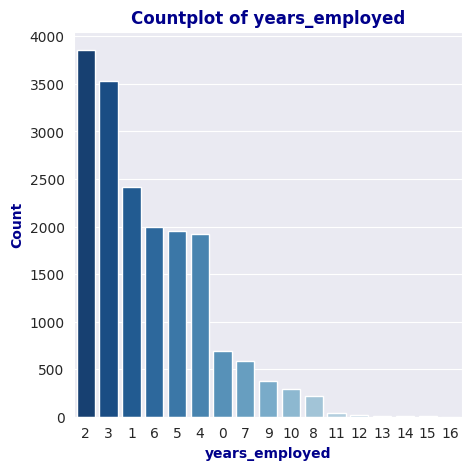

In [ ]:
count('years_employed')

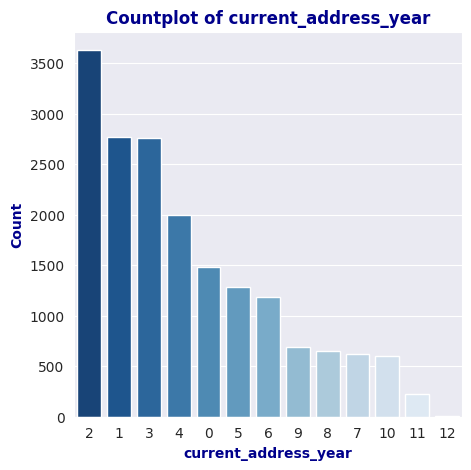

In [ ]:
count('current_address_year')

## 3.2 Distributions <a id=3.2></a>

In [ ]:
def hist(col):
    plt.figure(figsize=(5,5))
    sns.set_style('darkgrid')
    sns.histplot(data=df, x=col, palette='Blues_r', kde=True)
    plt.title(f'Distribution of {col}', fontdict={'weight': 'bold', 'color':'darkblue', 'size':12})
    plt.xlabel(col, fontdict={'weight': 'bold', 'color':'darkblue', 'size':10})
    plt.ylabel('Count', fontdict={'weight': 'bold', 'color':'darkblue', 'size':10})
    plt.show()

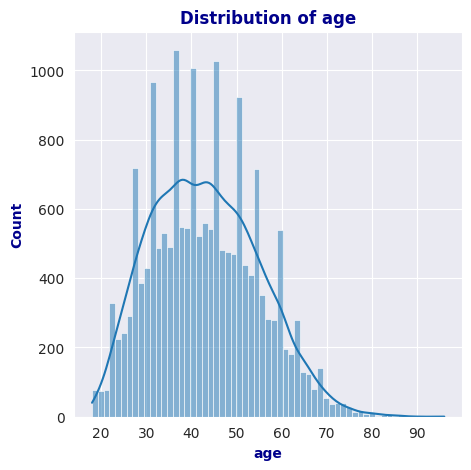

In [ ]:
hist('age')

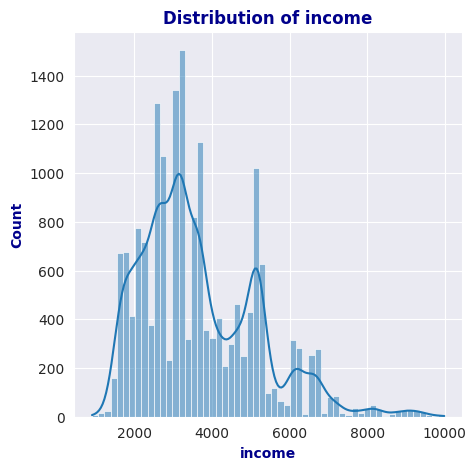

In [ ]:
hist('income')

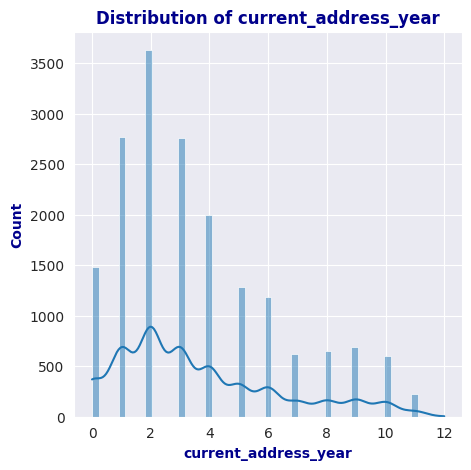

In [ ]:
hist('current_address_year')

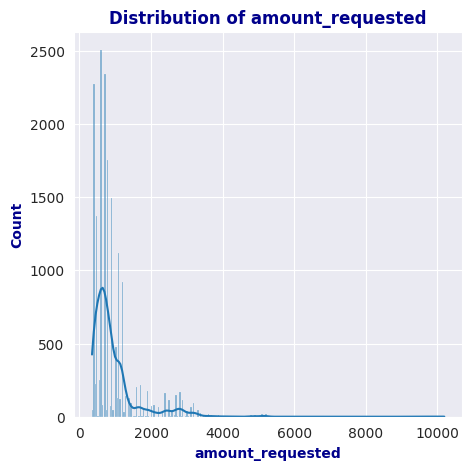

In [ ]:
hist('amount_requested')

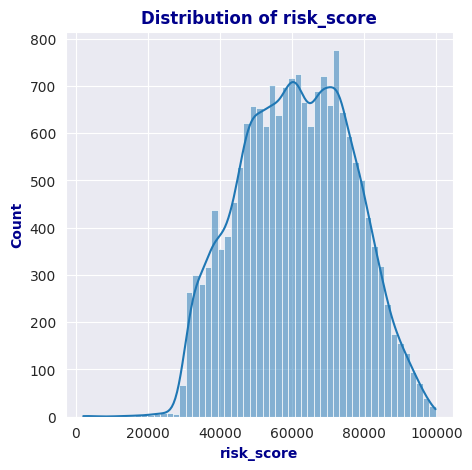

In [ ]:
hist('risk_score')

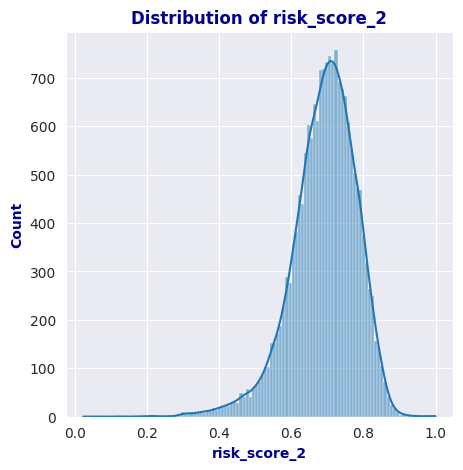

In [ ]:
hist('risk_score_2')

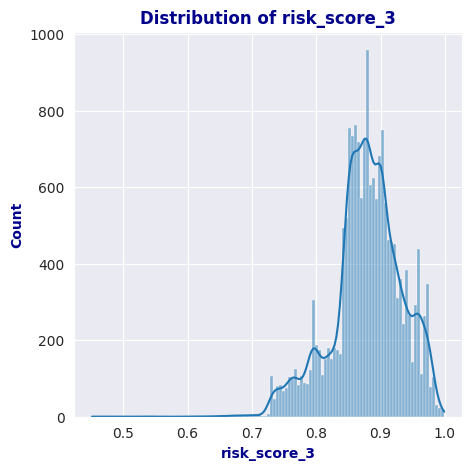

In [ ]:
hist('risk_score_3')

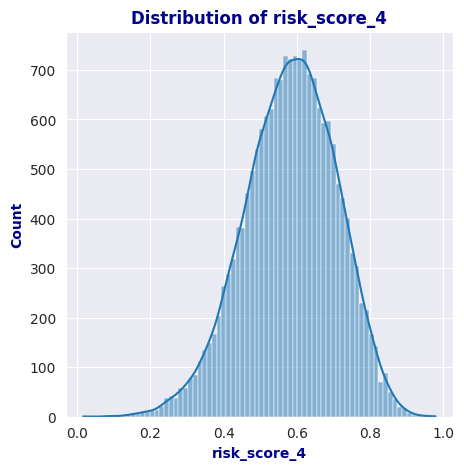

In [ ]:
hist('risk_score_4')

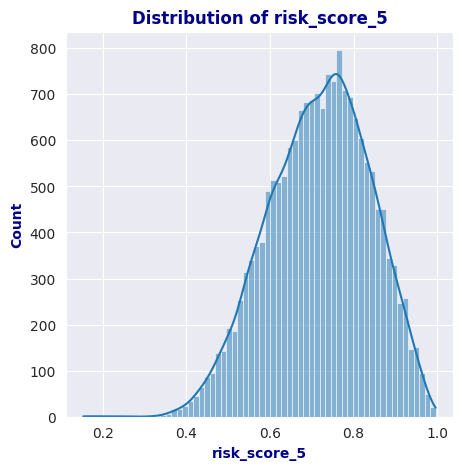

In [ ]:
hist('risk_score_5')

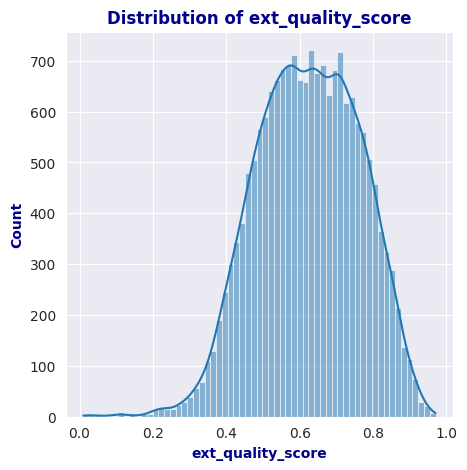

In [ ]:
hist('ext_quality_score')

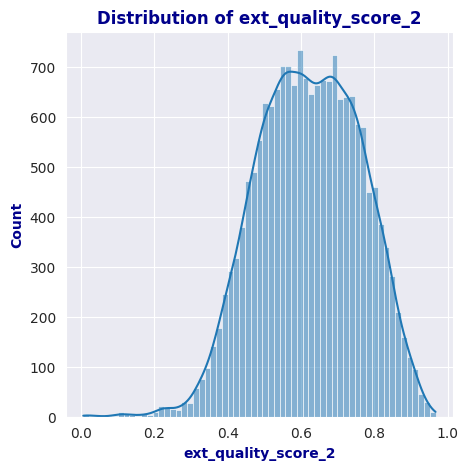

In [ ]:
hist('ext_quality_score_2')

## 3.3 Boxplot <a id=3.3></a>

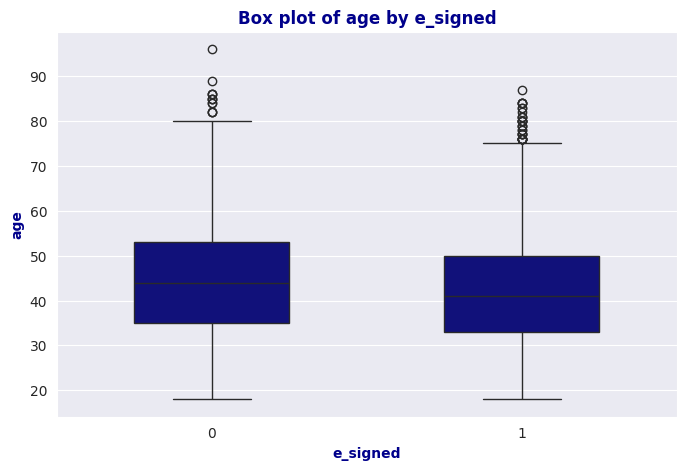

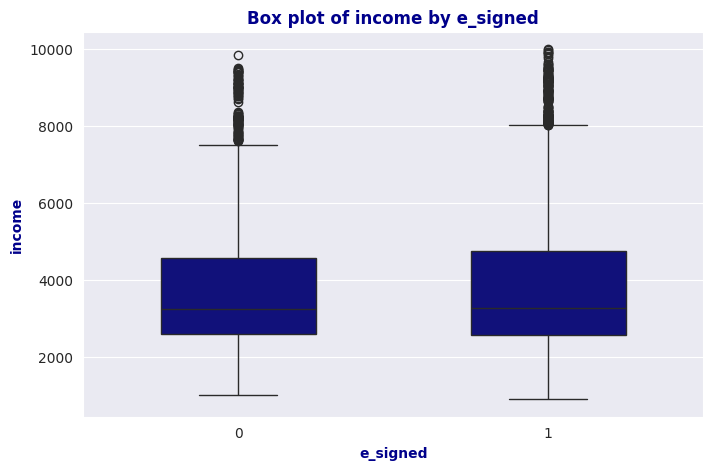

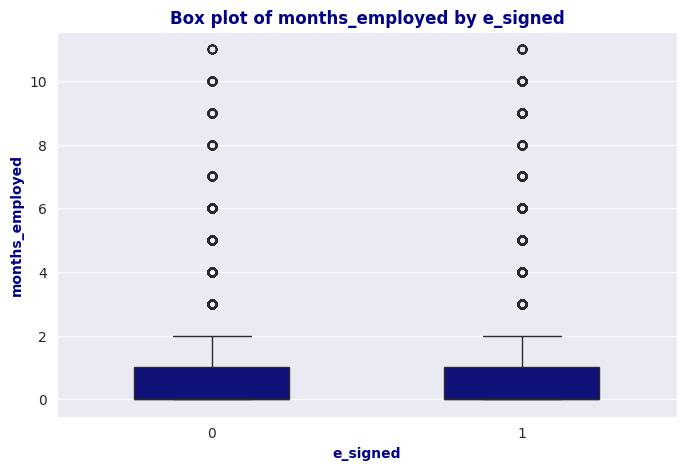

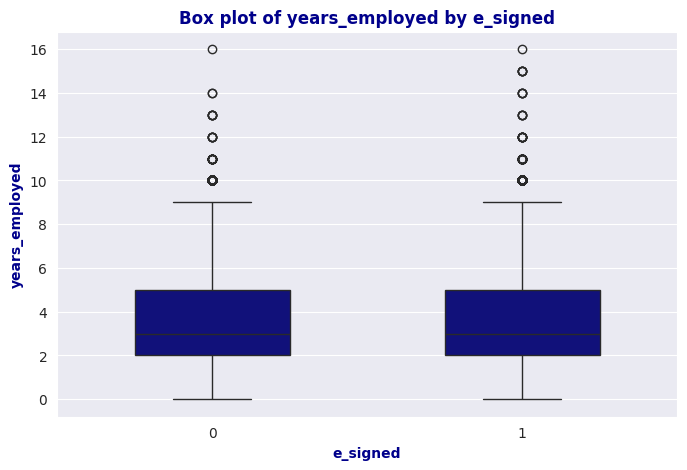

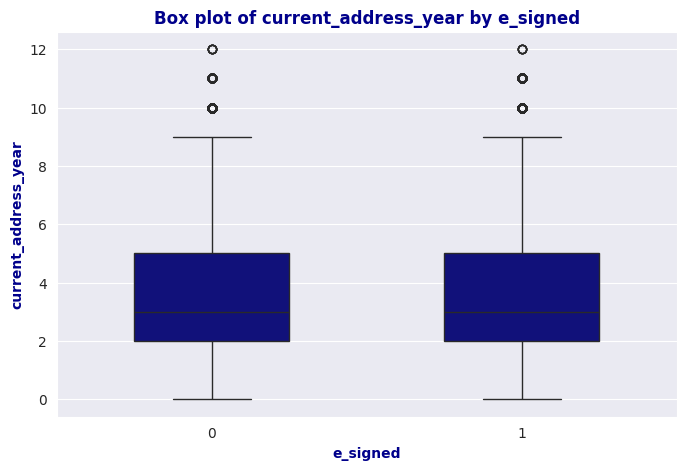

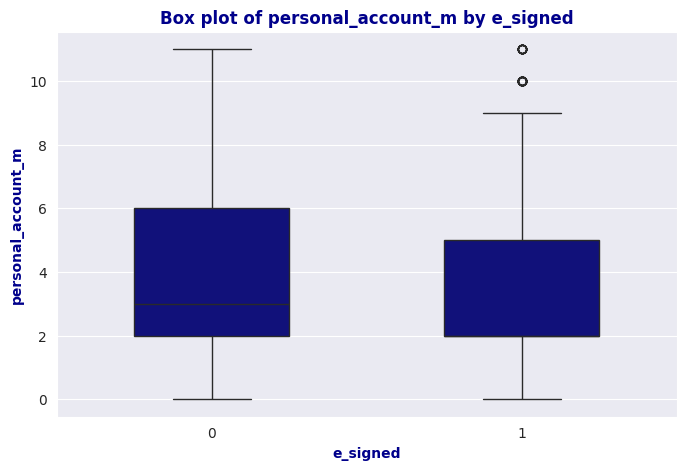

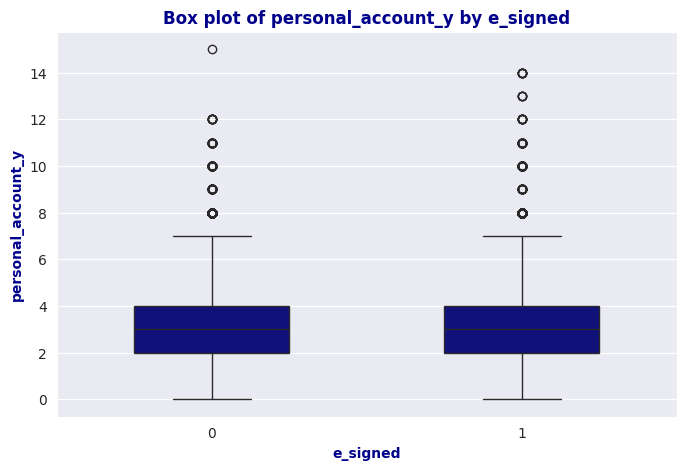

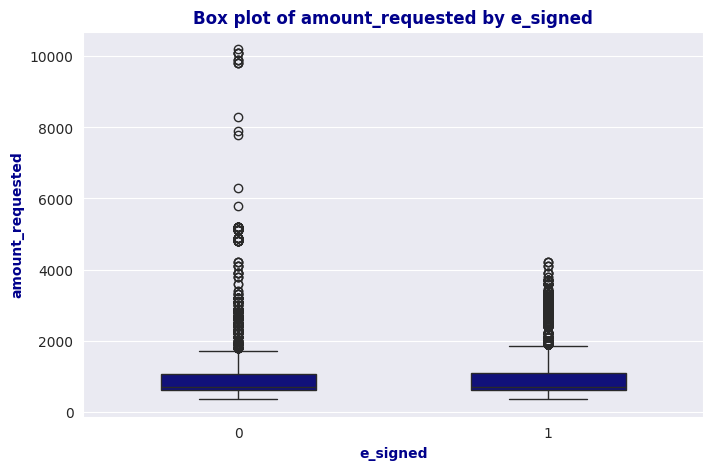

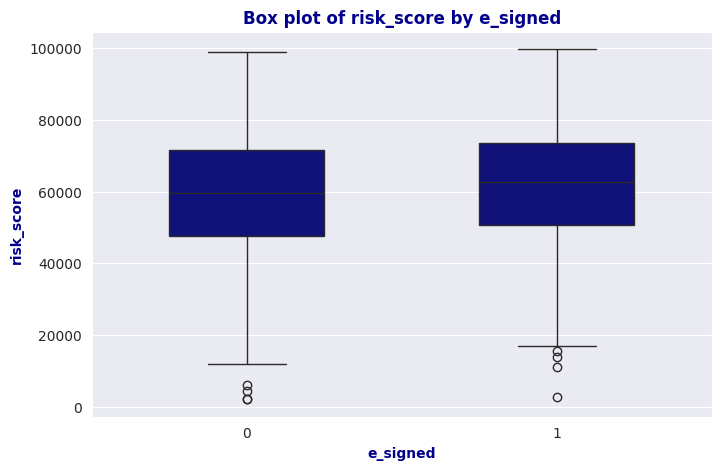

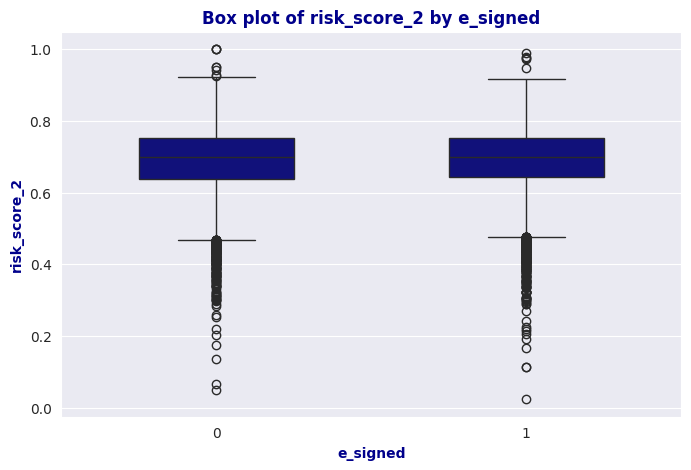

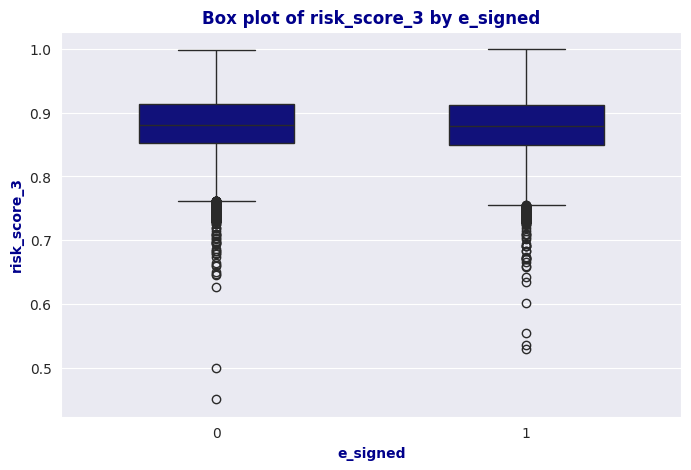

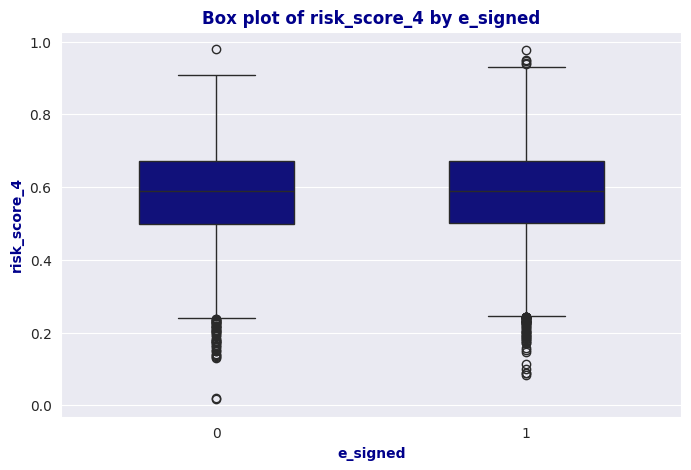

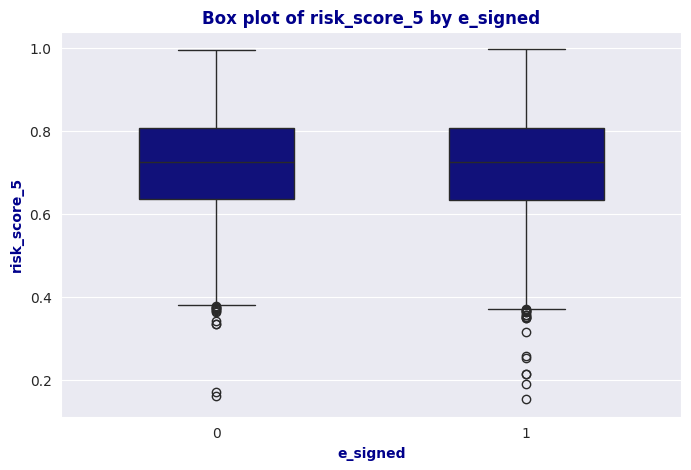

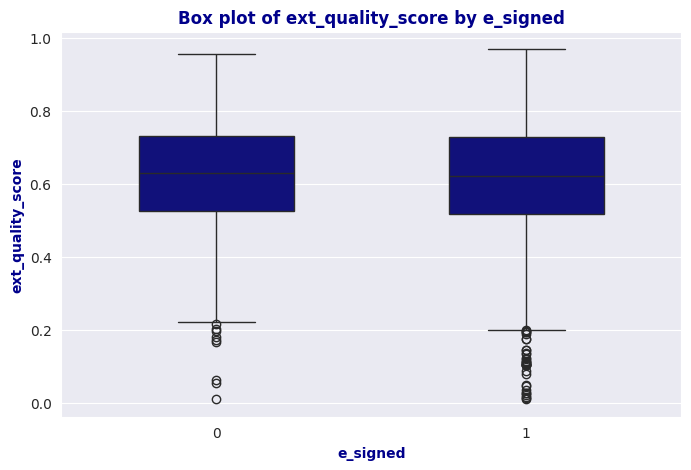

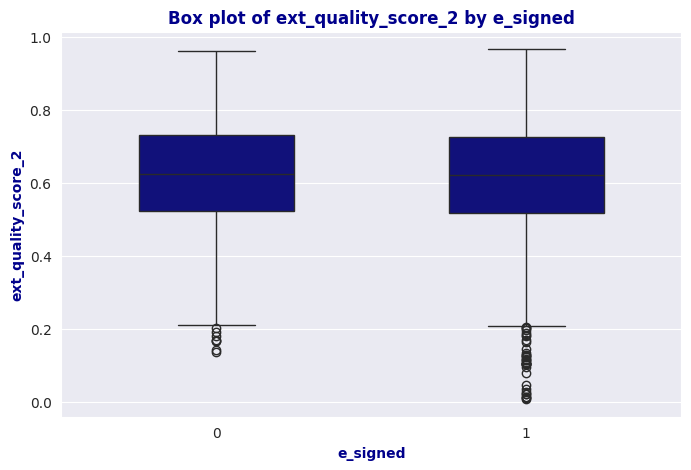

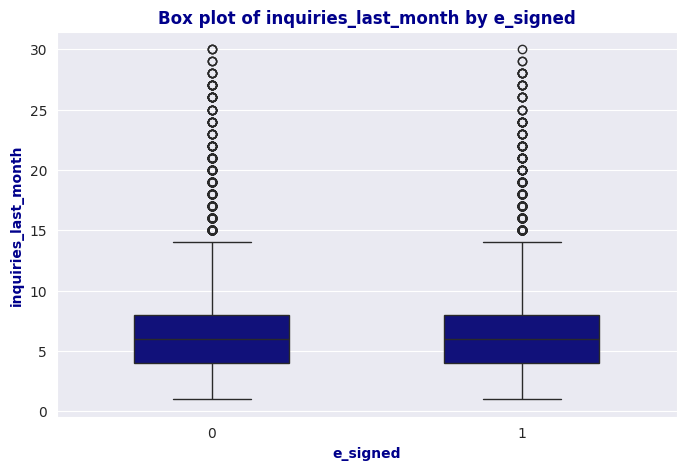

In [ ]:
numerical_features = ['age', 'income', 'months_employed', 'years_employed', 'current_address_year',
                      'personal_account_m', 'personal_account_y', 'amount_requested', 'risk_score',
                      'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score',
                      'ext_quality_score_2', 'inquiries_last_month']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='e_signed', y=feature, data=df, width=0.5, color='darkblue')
    plt.title(f'Box plot of {feature} by e_signed', fontdict={'weight': 'bold', 'color':'darkblue', 'size':12})
    plt.xlabel('e_signed', fontdict={'weight': 'bold', 'color':'darkblue', 'size':10})
    plt.ylabel(feature, fontdict={'weight': 'bold', 'color':'darkblue', 'size':10})
    plt.show()
    print()


# 4. Preprocessing <a id=4></a>

## 4.1 Encoding Categorical Variables <a id=4.1></a>

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,False,False,False
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,False,False,True
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,False,False,True
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,False,False,False
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,False,True,False


In [ ]:
df_encoded.shape

(17908, 23)

## 4.2 Feature Engineering <a id=4.2></a>

_performing a transformation on the dataset to create a new feature called months_employed. The purpose of this calculation is to express the total duration of employment in a unified unit, which in this case is months_


In [ ]:
df_encoded['months employeed'] = (df_encoded.months_employed + df_encoded.years_employed *12)

# Drop months_employed & years_employed
df_encoded.drop(['years_employed', 'months_employed'], axis=1, inplace=True)

In [ ]:
df_encoded.head(1)

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employeed
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.487712,0.515977,0.580918,0.380918,10,1,False,False,False,36


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   entry_id                   17908 non-null  int64  
 1   age                        17908 non-null  int64  
 2   home_owner                 17908 non-null  int64  
 3   income                     17908 non-null  int64  
 4   current_address_year       17908 non-null  int64  
 5   personal_account_m         17908 non-null  int64  
 6   personal_account_y         17908 non-null  int64  
 7   has_debt                   17908 non-null  int64  
 8   amount_requested           17908 non-null  int64  
 9   risk_score                 17908 non-null  int64  
 10  risk_score_2               17908 non-null  float64
 11  risk_score_3               17908 non-null  float64
 12  risk_score_4               17908 non-null  float64
 13  risk_score_5               17908 non-null  flo

_Performing a similar transformation to the previous one, but this time we focused on the `personal_account_m` and `personal_account_y` columns.The purpose of this calculation is to express the total duration for which a personal account has been held in a unified unit, which in this case is months._

In [ ]:
df_encoded['personnal account months'] = (df_encoded.personal_account_m + df_encoded.personal_account_y *12)
df_encoded.drop(['personal_account_m', 'personal_account_y'], axis=1, inplace=True)

In [ ]:
df_encoded.head(1)

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employeed,personnal account months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,False,False,False,36,30


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   entry_id                   17908 non-null  int64  
 1   age                        17908 non-null  int64  
 2   home_owner                 17908 non-null  int64  
 3   income                     17908 non-null  int64  
 4   current_address_year       17908 non-null  int64  
 5   has_debt                   17908 non-null  int64  
 6   amount_requested           17908 non-null  int64  
 7   risk_score                 17908 non-null  int64  
 8   risk_score_2               17908 non-null  float64
 9   risk_score_3               17908 non-null  float64
 10  risk_score_4               17908 non-null  float64
 11  risk_score_5               17908 non-null  float64
 12  ext_quality_score          17908 non-null  float64
 13  ext_quality_score_2        17908 non-null  flo

# 5. Correlation Matrix & Heatmap <a id=5></a>

## 5.1 Correlation Bar <a id=5.1></a>

In [ ]:
df_2 = df_encoded.drop(['e_signed', 'entry_id'], axis=1)
df_2.head(1)

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employeed,personnal account months
0,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,False,False,False,36,30


<Axes: title={'center': 'Correlation with e_signed'}>

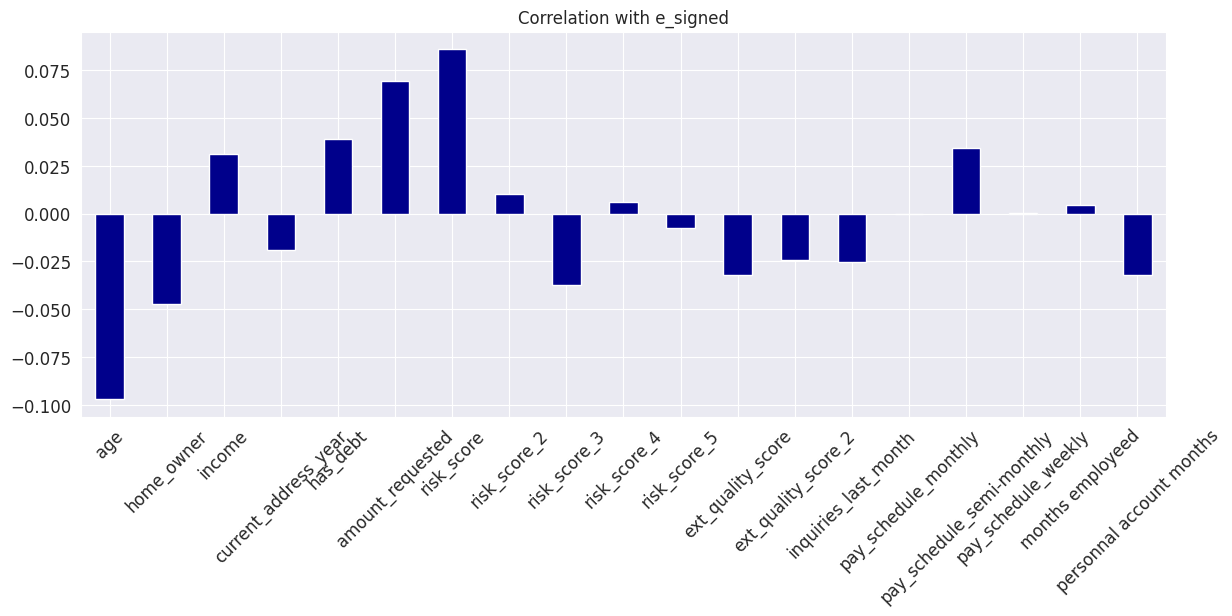

In [ ]:
df_2.corrwith(df_encoded['e_signed']).plot.bar(
    figsize=(14, 5),
    title='Correlation with e_signed',
    fontsize=12,
    rot=45,
    color='darkblue',
    grid=True
)

In [ ]:
correlations = df[numerical_features + ['e_signed']].corr()
print(correlations['e_signed'].sort_values(ascending=False))

e_signed                1.000000
risk_score              0.086098
amount_requested        0.069572
income                  0.031377
risk_score_2            0.010473
months_employed         0.010128
risk_score_4            0.006147
years_employed          0.003748
risk_score_5           -0.007541
current_address_year   -0.018969
personal_account_y     -0.024160
ext_quality_score_2    -0.024271
inquiries_last_month   -0.025165
ext_quality_score      -0.032129
risk_score_3           -0.037483
personal_account_m     -0.081195
age                    -0.096998
Name: e_signed, dtype: float64


## 5.2 Correlation Heatmap <a id=5.2></a>

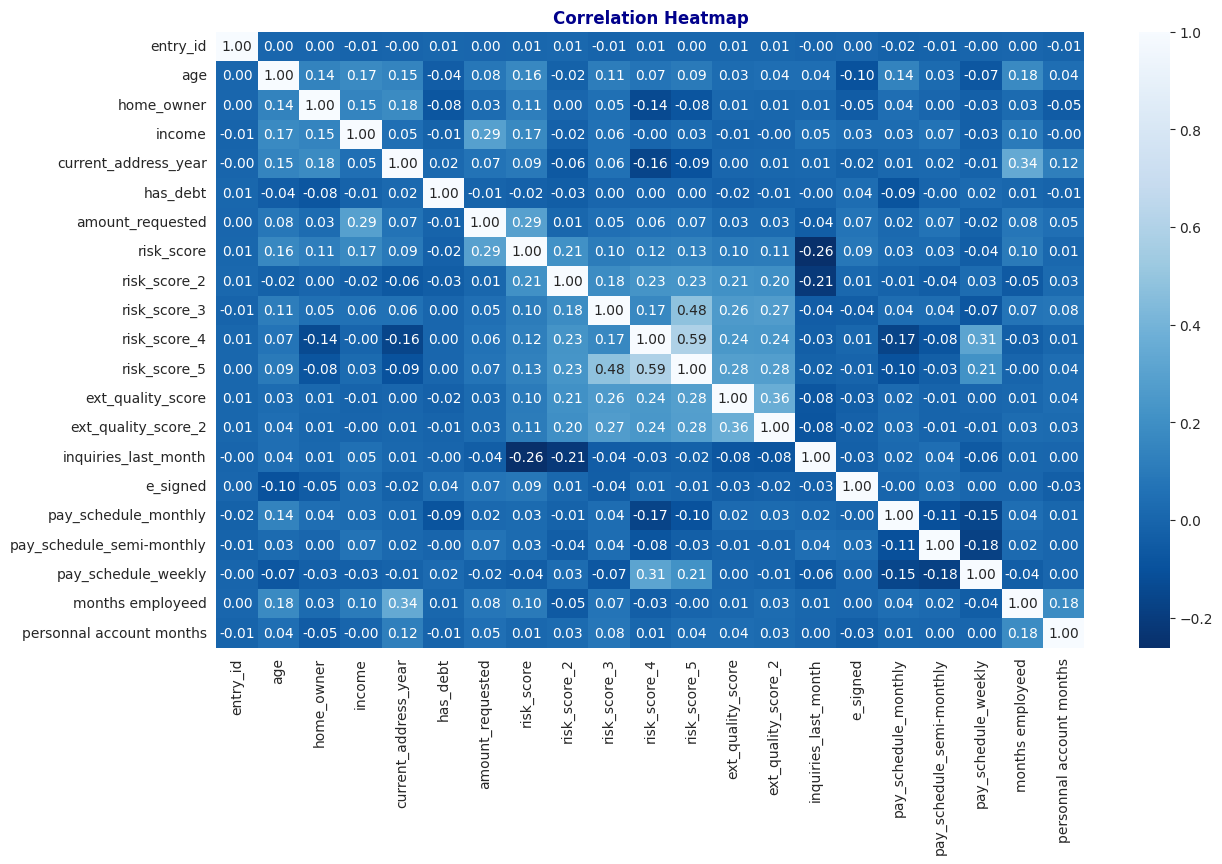

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='Blues_r', fmt='.2f')
plt.title('Correlation Heatmap', fontdict={'weight': 'bold', 'color':'darkblue', 'size':12})
plt.show()

# 6. Preparing Dataset for Modelling <a id=6></a>

## 6.1 Splitting Dependent/Independent Variabeles <a id=6.1></a>

In [ ]:
X = df_encoded.drop(['e_signed', 'entry_id'], axis=1)
y = df_encoded['e_signed']

In [ ]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (17908, 19)
y shape:  (17908,)


## 6.2 Definning Train/Test Sets <a id=6.2></a>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (14326, 19)
X_test Shape:  (3582, 19)
y_train Shape:  (14326,)
y_test Shape:  (3582,)


## 6.3 Feature Scaling <a id=6.3></a>

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaler instance
sc = StandardScaler()

# fit and transform train set
X_train = sc.fit_transform(X_train)

# transform test set
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[-1.01378918, -0.85634884, -0.24235846, ..., -0.50586115,
        -1.18309754, -0.32423091],
       [-1.01378918, -0.85634884, -0.33557695, ..., -0.50586115,
        -0.28443207,  0.19566597],
       [ 0.24595822, -0.85634884, -0.59858627, ..., -0.50586115,
         2.86089705, -0.84412778],
       ...,
       [-0.08997442, -0.85634884, -0.41214928, ..., -0.50586115,
         1.06356612,  0.36896493],
       [-0.25794074, -0.85634884, -0.25567539, ..., -0.50586115,
         0.61423339,  0.19566597],
       [-0.08997442, -0.85634884, -0.72176785, ...,  1.97682704,
        -0.28443207,  1.75535659]])

In [ ]:
X_train

array([[-0.00599126, -0.85634884, -0.24235846, ...,  1.97682704,
        -1.4077639 ,  0.36896493],
       [-0.50989022, -0.85634884, -0.05259224, ..., -0.50586115,
         0.35212263, -0.28090617],
       [-0.7618397 ,  1.16774842, -0.41214928, ..., -0.50586115,
        -1.18309754,  0.19566597],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ..., -0.50586115,
        -0.65887602, -1.45067413],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -0.50586115,
         2.41156432,  3.83494409],
       [-0.7618397 , -0.85634884, -0.36554004, ..., -0.50586115,
         0.35212263, -1.27737518]])

# 7. Modelling <a id=7></a>

## 7.1 LogisticRegression <a id=7.1></a>

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define logisticregression instance
classifier_lr = LogisticRegression()

# Fit the model
classifier_lr.fit(X_train, y_train)

# Prediction on test set
y_pred_lr = classifier_lr.predict(X_test)

In [ ]:
# Check accuracy of model
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

[[ 654 1000]
 [ 566 1362]]
0.5628140703517588


## 7.2 SVM <a id=7.2></a>

In [ ]:
from sklearn.svm import SVC

# Define SVM instance
classifier_svm = SVC()

# Fit model
classifier_svm.fit(X_train, y_train)

# Prediction on test set
y_pred_svc = classifier_svm.predict(X_test)

In [ ]:
# Check accuracy of model
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred_svc))
print(accuracy_score(y_test, y_pred_svc))

[[ 797  857]
 [ 595 1333]]
0.5946398659966499


## 7.3 RandomForest Classifier <a id=7.3></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Define RandomForest instance
classifier_rf = RandomForestClassifier(random_state=0)
# Fit model
classifier_rf.fit(X_train, y_train)

# Prediction on test set
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
# Check accuracy of model
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

[[ 959  695]
 [ 622 1306]]
0.6323283082077052


### 7.3.1 Hyperparameter Search <a id=7.3.1></a>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_tuned = RandomForestClassifier(random_state=0)

params = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 1000],  # Number of trees in the forest
    'criterion': ['gini', 'entropy', 'log_loss'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],  # Minimum number of samples required to be at a leaf node
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],  # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],  # Maximum number of leaf nodes
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],  # Complexity parameter used for Minimal Cost-Complexity Pruning
}

# RandomizedSearchCv
random_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=params, n_iter=10,
                               scoring='roc_auc', n_jobs=-1, cv=10, verbose=1)

# Fitting
random_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.3,
                                                      0.4, 0.5],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4, 0.5],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 1000]},
                   scoring='roc_auc', verbose=1)

In [ ]:
best_score = random_cv.best_score_
best_params = random_cv.best_params_
best_estimator = random_cv.best_estimator_

print("Best Score: ", best_score)
print("Best Parameters: ", best_params)
print('\nBest Estimator: ', best_estimator)

Best Score:  0.5764315188626541
Best Parameters:  {'n_estimators': 50, 'min_weight_fraction_leaf': 0.3, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_leaf_nodes': 50, 'max_features': 'sqrt', 'max_depth': 80, 'criterion': 'gini', 'ccp_alpha': 0.0}

Best Estimator:  RandomForestClassifier(max_depth=80, max_leaf_nodes=50, min_samples_split=15,
                       min_weight_fraction_leaf=0.3, n_estimators=50,
                       random_state=0)


_Train RandomForest Classifier based on hyperparameter search results_

In [ ]:
rf = RandomForestClassifier(**best_params, random_state=0)

# Fit model
rf.fit(X_train, y_train)

# Prediction on test set
y_pred_rf_tuned = rf.predict(X_test)

# Check accuracy of model
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred_rf_tuned))
print(accuracy_score(y_test, y_pred_rf_tuned))

[[   0 1654]
 [   0 1928]]
0.5382467895030709


## 7.4 XGBoost Classifier <a id=7.4></a>

In [ ]:
from xgboost import XGBClassifier

# Define XGBoost instance
classifier_xgb = XGBClassifier(random_state=0)

# Fit model
classifier_xgb.fit(X_train, y_train)

# Prediction on test set
y_pred_xgb = classifier_xgb.predict(X_test)

In [ ]:
# Check accuracy of model
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))

[[ 932  722]
 [ 602 1326]]
0.6303740926856505


### 7.4.1 Hyperparameter Search <a id=7.4.1></a>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb_tuned = XGBClassifier(random_state=0)

params = {
    'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.00, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7],
    'n_estimators':[100, 200, 500],
    'subsample':[0.5, 0.7, 1.0]
}

# RandomizedSearchCv
random_cv = RandomizedSearchCV(estimator=xgb_tuned, param_distributions=params, n_iter=10,
                               scoring='roc_auc', n_jobs=-1, cv=10, verbose=1)

# Fitting
random_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='roc_auc', verbose=1)

In [ ]:
best_score = random_cv.best_score_
best_params = random_cv.best_params_
best_estimator = random_cv.best_estimator_

print("Best Score: ", best_score)
print("Best Parameters: ", best_params)
print('\nBest Estimator: ', best_estimator)

Best Score:  0.7018659011638413
Best Parameters:  {'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.4}

Best Estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)


_Train XGBoost Classifier based on hyperparameter search result_

In [ ]:
xgb_tuned = XGBClassifier(**best_params)

# Fit model
xgb_tuned.fit(X_train, y_train)

# Prediction on test set
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Check accuracy of model
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred_xgb_tuned))
print(accuracy_score(y_test, y_pred_xgb_tuned))

[[ 956  698]
 [ 583 1345]]
0.6423785594639866
